<a href="https://colab.research.google.com/github/neel-machine/Clustering_Model/blob/main/KMeans_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install Transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.6 MB/s eta 0:00:00


In [3]:
from sklearn.cluster import KMeans

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)


In [5]:
mentors_df = pd.read_excel('Mentors.xlsx')
mentors_df.head()

,First Name,Last Name,Company,Job Title,Academic Institution,City,State,Soft Skills,Tools,Specialization,Column1
0,Sophia,Turnet,Asana,Software Engineer,Texas A&M,Austin,Texas,"communication, organization, critical thinking","Figma, Photoshop, Excel, Powerpoint","python, java, front end, back end, machine learning",NaN
1,Oliver,Smith,Google,Data Analyst,Stanford University,San Francisco,California,"communication, organization, critical thinking","Excel, Tableau, Python","data analysis, SQL, data visualization",NaN
2,Ethan,Johnson,Microsoft,UX Designer,Harvard University,Redmond,Washington,"creativity, problem solving, teamwork","Figma, Sketch, InVision","user experience, user interface, wireframing",NaN
3,Isabella,Williams,Apple,Product Manager,Massachusetts Institute of Technology,Cupertino,California,"leadership, analytical thinking, decision making","Powerpoint, JIRA, Excel","product management, product strategy, market research",NaN
4,Mason,Jones,Amazon,Software Engineer,University of California,Berkeley,Seattle,Washington,"communication, problem solving, teamwork","Java, Python, Git,full stack development, web development, software engineering",","


In [6]:
mentors_df.drop(columns='Column1',inplace=True,axis=1)

In [7]:
mentors_df.head()

,First Name,Last Name,Company,Job Title,Academic Institution,City,State,Soft Skills,Tools,Specialization
0,Sophia,Turnet,Asana,Software Engineer,Texas A&M,Austin,Texas,"communication, organization, critical thinking","Figma, Photoshop, Excel, Powerpoint","python, java, front end, back end, machine learning"
1,Oliver,Smith,Google,Data Analyst,Stanford University,San Francisco,California,"communication, organization, critical thinking","Excel, Tableau, Python","data analysis, SQL, data visualization"
2,Ethan,Johnson,Microsoft,UX Designer,Harvard University,Redmond,Washington,"creativity, problem solving, teamwork","Figma, Sketch, InVision","user experience, user interface, wireframing"
3,Isabella,Williams,Apple,Product Manager,Massachusetts Institute of Technology,Cupertino,California,"leadership, analytical thinking, decision making","Powerpoint, JIRA, Excel","product management, product strategy, market research"
4,Mason,Jones,Amazon,Software Engineer,University of California,Berkeley,Seattle,Washington,"communication, problem solving, teamwork","Java, Python, Git,full stack development, web development, software engineering"


In [8]:
mentors_df['clustering_attributes'] = mentors_df['Job Title']+' '+mentors_df['Academic Institution']+' '+mentors_df['Soft Skills'] + ' ' + mentors_df.Tools + ' '+ mentors_df.Specialization

In [9]:
mentors_df.clustering_attributes[0:5]

0                      Software Engineer Texas A&M communication, organization, critical thinking Figma, Photoshop, Excel, Powerpoint python, java, front end, back end, machine learning
1                                           Data Analyst Stanford University communication, organization, critical thinking Excel, Tableau, Python data analysis, SQL, data visualization
2                                               UX Designer Harvard University creativity, problem solving, teamwork Figma, Sketch, InVision user experience, user interface, wireframing
3    Product Manager Massachusetts Institute of Technology leadership, analytical thinking, decision making Powerpoint, JIRA, Excel product management, product strategy, market research
4          Software Engineer University of California Washington communication, problem solving, teamwork Java, Python, Git,full stack development, web development, software engineering
Name: clustering_attributes, dtype: object

# Next Steps


1.   Generate text embeddings - bert or openai
2.   Apply nearest neighbor search - Kmeans clustering



In [10]:
from gensim.parsing import preprocessing

def text_preprocessing(input_text:str)->str:
  processed_text = preprocessing.strip_punctuation(input_text)
  processed_text = preprocessing.strip_numeric(processed_text)
  processed_text = preprocessing.remove_stopwords(processed_text)
  return processed_text

In [11]:
mentors_df.clustering_attributes = mentors_df.clustering_attributes.apply(text_preprocessing)
mentors_df.clustering_attributes[0:5]

0                                 Software Engineer Texas A M communication organization critical thinking Figma Photoshop Excel Powerpoint python java end end machine learning
1                                        Data Analyst Stanford University communication organization critical thinking Excel Tableau Python data analysis SQL data visualization
2                                            UX Designer Harvard University creativity problem solving teamwork Figma Sketch InVision user experience user interface wireframing
3    Product Manager Massachusetts Institute Technology leadership analytical thinking decision making Powerpoint JIRA Excel product management product strategy market research
4               Software Engineer University California Washington communication problem solving teamwork Java Python Git stack development web development software engineering
Name: clustering_attributes, dtype: object

In [12]:
# hyperparameters
max_length = 140


In [66]:
#mentors_df['tokenised_text'] = mentors_df.clustering_attributes.apply(bert_tokeniser)

In [14]:
## Import libraries
from nltk.cluster import KMeansClusterer
import nltk

def clustering_question(NUM_CLUSTERS = 15):


    X = np.array(mentors_df['emb'].tolist())

    kclusterer = KMeansClusterer(
        NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,
        repeats=25,avoid_empty_clusters=True)

    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

    mentors_df['cluster'] = pd.Series(assigned_clusters, index=mentors_df.index)
    #data['centroid'] = data['cluster'].apply(lambda x: kclusterer.means()[x])

    #return data

KeyError: ignored

In [16]:
pip install spacy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
! pip install spacy --quiet
! pip3 install spacy-transformers --quiet
! python -m spacy download en_core_web_lg --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.8/190.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.9 MB/s eta 0:00:00
2023-06-10 03:02:31.261481: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-10 03:02:32.520559: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [19]:
import spacy
bert_uncased = spacy.load('en_core_web_lg')

# Utility function for generating sentence embedding from the text
def get_embeddinngs(text):
    return bert_uncased(text).vector

# Generating sentence embedding from the text
mentors_df['emb'] = mentors_df.clustering_attributes.apply(get_embeddinngs)


In [20]:
mentors_df.emb

0           [-1.8483452, 0.038855802, 1.7091438, 1.0436789, 2.7094362, 0.3864971, 2.0344079, 0.9895669, -1.2693805, -0.11998996, 3.3787606, 0.42667368, -3.971482, 2.3793721, -0.32065326, 1.2467079, 3.0548801, 1.8779898, -2.0887775, 1.2432553, 0.006281161, 2.7262208, -1.4599792, 0.9148626, -0.13809636, -1.7495812, -0.7945827, -1.1184137, -0.7181808, 1.0462341, -0.6019562, 0.79859364, -0.32499894, -1.0693502, -0.56493837, -0.61596006, 1.8318253, -0.2939257, 1.7992542, -0.60039854, 0.20900653, -1.5284195, -0.82834196, -0.6791379, -2.1935012, 0.09082625, -0.91897833, -0.029172145, -0.2655455, -3.2660208, 0.3428547, 1.3980031, 0.85699683, -2.059388, -1.2488909, 2.446188, -2.2148705, 1.3729515, -0.08940607, -1.589657, 1.9740051, 2.481518, -1.894048, 0.84866923, 0.30628687, 1.7001405, -1.1004226, -2.1235745, 0.69583696, 2.065388, -1.6569611, 0.33106834, -0.33926335, 0.81509894, 0.4711633, 1.5357437, -0.2165392, 0.5876516, 0.27222896, -0.42160058, -1.7496446, -1.9281434, -0.18086998, 1.6294756

In [21]:
clustering_question()

In [22]:
mentors_df.columns

Index(['First Name', 'Last Name', 'Company', 'Job Title',
       'Academic Institution', 'City', 'State', 'Soft Skills', 'Tools',
       'Specialization', 'clustering_attributes', 'emb', 'cluster'],
      dtype='object')

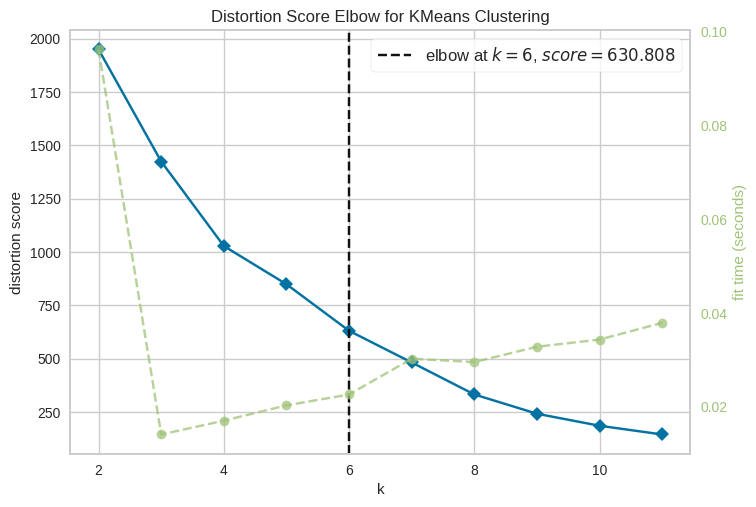

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Use the KElbowVisualizer to determine the optimal number of clusters
X = np.array(mentors_df.emb.tolist())
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X)
visualizer.show()

In [41]:
mentors_df.head(1)

,First Name,Last Name,Company,Job Title,Academic Institution,City,State,Soft Skills,Tools,Specialization,clustering_attributes,emb,cluster
0,Sophia,Turnet,Asana,Software Engineer,Texas A&M,Austin,Texas,"communication, organization, critical thinking","Figma, Photoshop, Excel, Powerpoint","python, java, front end, back end, machine learning",Software Engineer Texas A M communication organization critical thinking Figma Photoshop Excel Powerpoint python java end end machine learning,"[-1.8483452, 0.038855802, 1.7091438, 1.0436789, 2.7094362, 0.3864971, 2.0344079, 0.9895669, -1.2693805, -0.11998996, 3.3787606, 0.42667368, -3.971482, 2.3793721, -0.32065326, 1.2467079, 3.0548801, 1.8779898, -2.0887775, 1.2432553, 0.006281161, 2.7262208, -1.4599792, 0.9148626, -0.13809636, -1.7495812, -0.7945827, -1.1184137, -0.7181808, 1.0462341, -0.6019562, 0.79859364, -0.32499894, -1.0693502, -0.56493837, -0.61596006, 1.8318253, -0.2939257, 1.7992542, -0.60039854, 0.20900653, -1.5284195, -0.82834196, -0.6791379, -2.1935012, 0.09082625, -0.91897833, -0.029172145, -0.2655455, -3.2660208, 0.3428547, 1.3980031, 0.85699683, -2.059388, -1.2488909, 2.446188, -2.2148705, 1.3729515, -0.08940607, -1.589657, 1.9740051, 2.481518, -1.894048, 0.84866923, 0.30628687, 1.7001405, -1.1004226, -2.1235745, 0.69583696, 2.065388, -1.6569611, 0.33106834, -0.33926335, 0.81509894, 0.4711633, 1.5357437, -0.2165392, 0.5876516, 0.27222896, -0.42160058, -1.7496446, -1.9281434, -0.18086998, 1.6294756, 0.9022836, -1.2435931, 0.09540839, 0.3297784, 0.0065417853, -1.4918928, -0.49702257, 1.2844083, 0.5997842, -0.30468366, 0.13844204, -0.2701579, -0.72608334, 0.5023141, 1.3367877, 0.16555004, ...]",9


In [26]:
import matplotlib.pyplot as plt


In [27]:
from yellowbrick import cluster
#filter rows of original data
filtered_label2 = mentors_df[cluster == 2]
 
filtered_label1 = mentors_df[cluster == 1]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

KeyError: ignored

In [45]:
final_model = KMeans(n_clusters=6,init="k-means++")
mentors_df['cluster'] = final_model.fit_predict(X)

In [46]:
mentors_df[['Company','Job Title','Academic Institution','Soft Skills','Tools','Specialization','cluster']]

,Company,Job Title,Academic Institution,Soft Skills,Tools,Specialization,cluster
0,Asana,Software Engineer,Texas A&M,"communication, organization, critical thinking","Figma, Photoshop, Excel, Powerpoint","python, java, front end, back end, machine learning",3
1,Google,Data Analyst,Stanford University,"communication, organization, critical thinking","Excel, Tableau, Python","data analysis, SQL, data visualization",1
2,Microsoft,UX Designer,Harvard University,"creativity, problem solving, teamwork","Figma, Sketch, InVision","user experience, user interface, wireframing",2
3,Apple,Product Manager,Massachusetts Institute of Technology,"leadership, analytical thinking, decision making","Powerpoint, JIRA, Excel","product management, product strategy, market research",5
4,Amazon,Software Engineer,University of California,Washington,"communication, problem solving, teamwork","Java, Python, Git,full stack development, web development, software engineering",3
5,Facebook,Data Scientist,University of Washington,"data analysis, critical thinking, statistical analysis","R, Python, Tableau","data science, machine learning, data mining",1
6,Netflix,Software Developer,Princeton University,"communication, problem solving, teamwork","JavaScript, React, Node.js","front end development, web development, software engineering",3
7,Oracle,Database Administrator,University of Texas at Austin,"organization, attention to detail, problem solving","SQL, Oracle Database, SQL Developer","database management, SQL, data security",4
8,IBM,Machine Learning Engineer,University of California,New York,"analytical thinking, problem solving, creativity","Python, TensorFlow, Jupyter Notebook",0
9,Intel,Software Engineer,California Institute of Technology,"communication, problem solving, teamwork","C++, Java, Visual Studio","back end development, software engineering, algorithms",3


In [61]:
mentors_df.groupby('cluster')['Job Title'].apply(list).reset_index()


,cluster,Job Title
0,0,[Machine Learning Engineer]
1,1,"[Data Analyst, Data Scientist, Data Analyst, Data Scientist, Data Analyst, Data Scientist]"
2,2,"[UX Designer, UX Designer, UX Designer, UX Designer]"
3,3,"[Software Engineer, Software Engineer, Software Developer, Software Engineer, Software Engineer, Software Developer, Software Engineer, Software Developer]"
4,4,[Database Administrator]
5,5,"[Product Manager, Product Manager, Product Manager]"


# To Do


1.   Implement MLFlow for model registry and tracking
2.   If you have to deploy this model create a 

